In [1]:
#Check Version
import statsmodels._version
if statsmodels._version.get_versions()['version'] != '0.11.1':
  !pip install --upgrade statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv('co2_mm_mlo.csv')

In [4]:
df.head

<bound method NDFrame.head of      year  month  decimal_date  average  interpolated
0    1958      3      1958.208   315.71        315.71
1    1958      4      1958.292   317.45        317.45
2    1958      5      1958.375   317.50        317.50
3    1958      6      1958.458      NaN        317.10
4    1958      7      1958.542   315.86        315.86
..    ...    ...           ...      ...           ...
724  2018      7      2018.542   408.71        408.71
725  2018      8      2018.625   406.99        406.99
726  2018      9      2018.708   405.51        405.51
727  2018     10      2018.792   406.00        406.00
728  2018     11      2018.875   408.02        408.02

[729 rows x 5 columns]>

In [5]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [6]:
df.set_index('date',inplace=True)

In [7]:
df.index.freq = 'MS' # Month Start

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


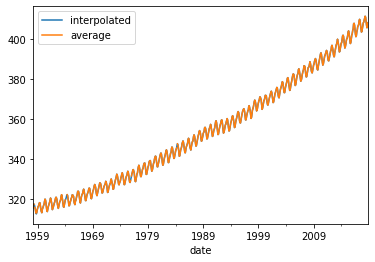

In [9]:
df[['interpolated','average']].plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

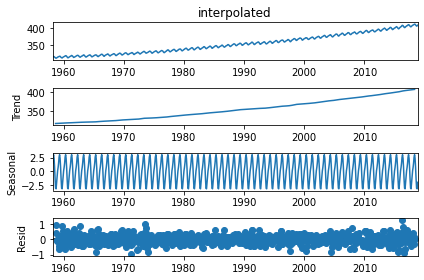

In [11]:
result = seasonal_decompose(df['interpolated'])
result.plot();

In [12]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 7.9MB/s 


In [16]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.0MB/s 
     |████████████████████████████████| 2.1MB 46.7MB/s 
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


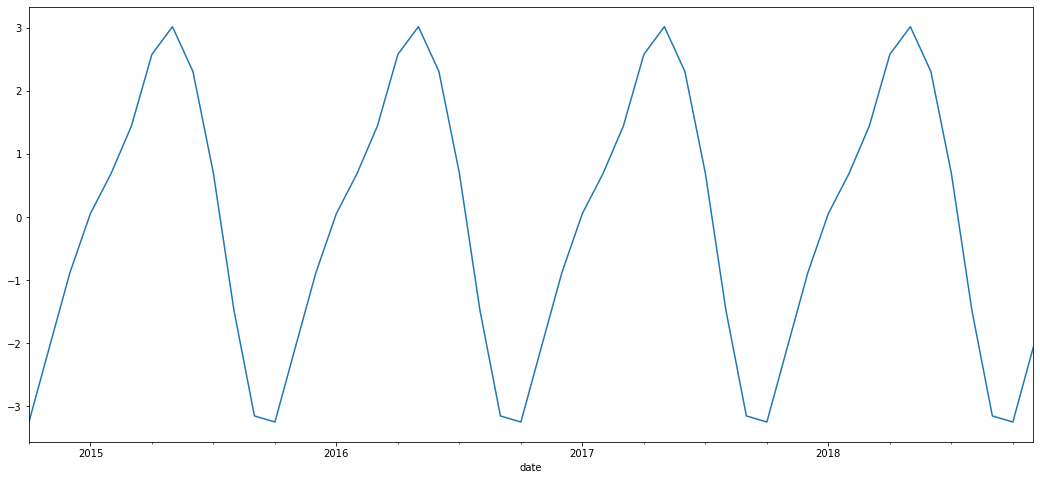

In [13]:
result.seasonal.iloc[-50:].plot(figsize=(18,8))

In [14]:
from pyramid import auto_arima

In [17]:
from pmdarima import auto_arima

In [19]:
res = auto_arima(df['interpolated'],seasonal=True,m=12,trace=True,method='nm',maxiter=2000)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=430.869, BIC=467.591, Time=13.240 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=2369.532, BIC=2378.713, Time=0.108 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=804.406, BIC=822.768, Time=3.009 seconds
Near non-invertible roots for order (1, 1, 0)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1614.808, BIC=1633.170, Time=2.685 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=2375.248, BIC=2379.838, Time=0.040 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=1101.952, BIC=1134.084, Time=13.976 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=763.216, BIC=795.348, Time=15.159 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=431.532, BIC=472.844, Time=62.281 seconds
Fit ARIMA(2,1,2)x(1,0,2,12) [intercept=True]; AIC=431.441